Name : Akshay Kumar <br>
PRN : 20070243001   <br>
Subject : Deep Learning  <br>
Assignment - 4 : RNN and LSTM model building on company stocks data

# Part 1- Data upload, Data read and data preprocess and EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading Libraries

In [ ]:
#Import  the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Loading Data 

In [ ]:
#importing the training data
data_train = pd.read_csv("/content/drive/MyDrive/Dataset/Nestle_Stocks/NESTLEIND.NS_Train.csv")
training_set = data_train.iloc[:,1:2].values
training_set 

array([[ 7900.      ],
       [ 7855.      ],
       [ 7900.      ],
       [ 7865.      ],
       [ 7846.299805],
       [ 7830.      ],
       [ 7941.149902],
       [ 7850.      ],
       [ 7854.799805],
       [ 7878.      ],
       [ 7815.      ],
       [ 7760.      ],
       [ 7799.700195],
       [ 7830.      ],
       [ 7800.      ],
       [ 7667.549805],
       [ 7699.      ],
       [ 7630.      ],
       [ 7553.      ],
       [ 7530.      ],
       [ 7520.      ],
       [ 7483.950195],
       [ 7499.      ],
       [ 7300.      ],
       [ 7130.      ],
       [ 7000.      ],
       [ 7097.950195],
       [ 7014.      ],
       [ 6973.      ],
       [ 6998.      ],
       [ 7200.      ],
       [ 7500.      ],
       [ 7650.      ],
       [ 7630.      ],
       [ 7520.      ],
       [ 7579.      ],
       [ 7599.      ],
       [ 7573.      ],
       [ 7615.      ],
       [ 7644.      ],
       [ 7759.      ],
       [ 7777.      ],
       [ 7880.      ],
       [ 77

In [ ]:
#Loading Test data 1 (Jan- Mar 2020)
dataset_test1 = pd.read_csv('/content/drive/MyDrive/Dataset/Nestle_Stocks/NESTLEIND.NS_Test1.csv')
real_stock_values = dataset_test1.iloc[:,1:2].values
real_stock_values

array([[14819.      ],
       [14848.900391],
       [14750.      ],
       [14542.      ],
       [14423.549805],
       [14191.599609],
       [14495.      ],
       [14643.450195],
       [14747.900391],
       [14657.900391],
       [14828.      ],
       [14851.      ],
       [15399.      ],
       [15230.150391],
       [15361.049805],
       [15369.      ],
       [15500.      ],
       [15600.      ],
       [15700.      ],
       [15664.      ],
       [15585.      ],
       [15802.      ],
       [15560.      ],
       [15589.      ],
       [16400.      ],
       [16476.      ],
       [16399.      ],
       [16340.      ],
       [16300.      ],
       [16240.      ],
       [16026.      ],
       [16328.      ],
       [16500.      ],
       [16413.      ],
       [16569.900391],
       [16538.599609],
       [16740.      ],
       [16499.      ],
       [16373.      ],
       [16545.      ],
       [16300.      ],
       [16042.      ],
       [15950.      ],
       [161

In [ ]:
dataset_test2 = pd.read_csv('/content/drive/MyDrive/Dataset/Nestle_Stocks/NESTLEIND.NS_Test2.csv')
real_stock_values2 = dataset_test2.iloc[:,1:2].values
real_stock_values2

array([[16300.25    ],
       [15939.700195],
       [15575.      ],
       [16650.      ],
       [17436.949219],
       [16845.      ],
       [16657.099609],
       [17320.      ],
       [18369.949219],
       [17489.800781],
       [16800.      ],
       [17008.349609],
       [17599.949219],
       [17300.      ],
       [17585.      ],
       [17976.5     ],
       [17748.      ],
       [17700.      ],
       [17420.5     ],
       [17571.      ],
       [17421.5     ],
       [17200.      ],
       [17350.      ],
       [17770.      ],
       [17609.      ],
       [17750.      ],
       [16600.      ],
       [16500.      ],
       [16441.      ],
       [16280.200195],
       [16241.      ],
       [16330.      ],
       [16296.      ],
       [16380.      ],
       [16700.      ],
       [16716.5     ],
       [16950.      ],
       [17540.800781],
       [17477.      ],
       [17175.      ],
       [17406.900391],
       [17317.      ],
       [17250.      ],
       [166

### Exploration of training data

Text(0.5, 1.0, 'Comparison of Open and Close Values')

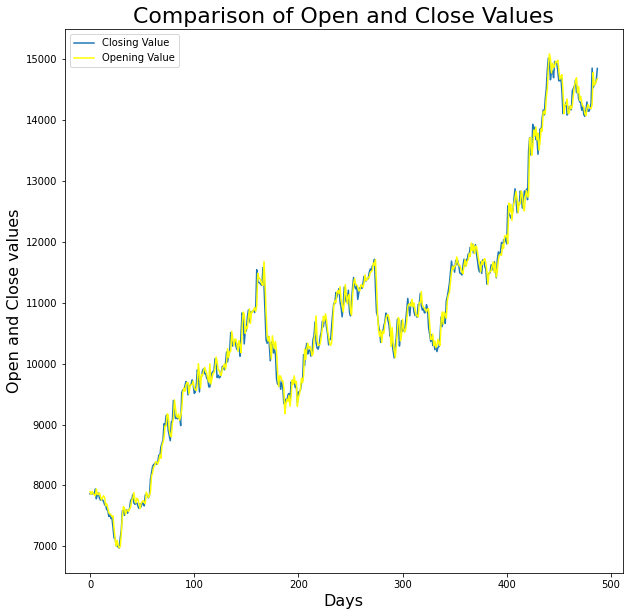

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(data_train.Close, color = 'C0',label = 'Closing Value'), plt.plot(data_train.Open, color = 'yellow', label = 'Opening Value')
plt.legend(loc = 'best')
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Open and Close values',fontsize = 16)
plt.title("Comparison of Open and Close Values",fontsize = 22)

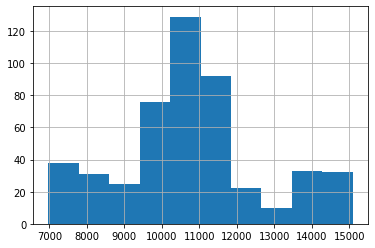

In [ ]:
data_train['Open'].hist()

Text(0.5, 0, 'Days')

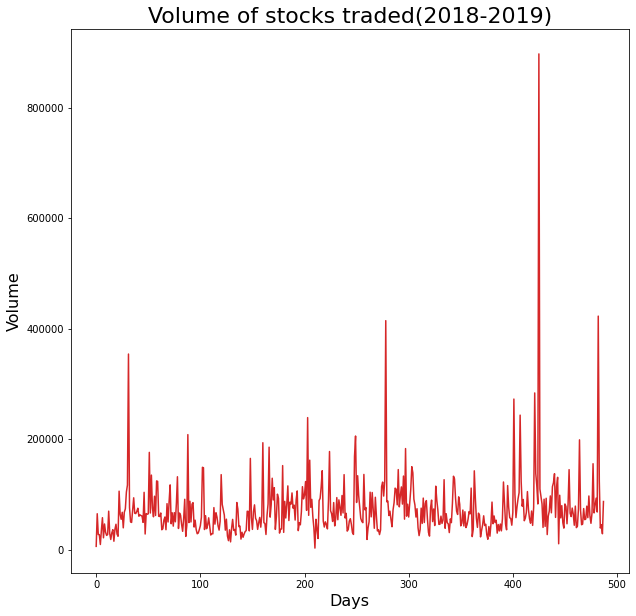

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(data_train.Volume, color = 'C3')
plt.title('Volume of stocks traded(2018-2019)', fontsize = 22)
plt.ylabel('Volume',fontsize= 16)
plt.xlabel('Days',fontsize= 16)

Text(0.5, 0, 'Days')

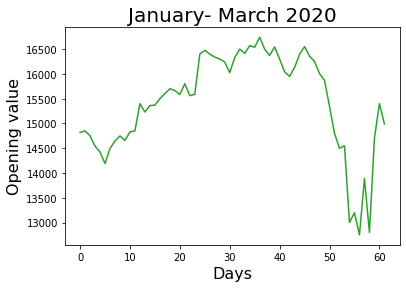

In [ ]:
plt.plot(dataset_test1.Open, color = 'C2')
plt.title("January- March 2020", fontsize = 20)
plt.ylabel('Opening value', fontsize = 16)
plt.xlabel('Days',fontsize= 16)

Text(0.5, 0, 'Days')

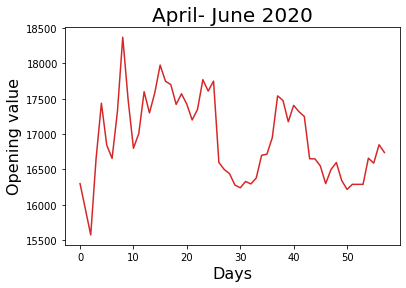

In [ ]:
plt.plot(dataset_test2.Open, color = 'C3')
plt.title("April- June 2020", fontsize = 20)
plt.ylabel('Opening value', fontsize = 16)
plt.xlabel('Days',fontsize= 16)

##Data Preprocessing

In [ ]:
# Feature Scaling using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.11419069],
       [0.10864745],
       [0.11419069],
       [0.10987928],
       [0.10757573],
       [0.10556787],
       [0.11925966],
       [0.10803153],
       [0.10862279],
       [0.11148066],
       [0.10372013],
       [0.09694506],
       [0.10183545],
       [0.10556787],
       [0.10187238],
       [0.08555676],
       [0.08943089],
       [0.08093126],
       [0.07144617],
       [0.06861296],
       [0.06738113],
       [0.0629404 ],
       [0.06479428],
       [0.04028086],
       [0.01933974],
       [0.00332594],
       [0.01539175],
       [0.00505051],
       [0.        ],
       [0.00307958],
       [0.02796255],
       [0.06491747],
       [0.08339492],
       [0.08093126],
       [0.06738113],
       [0.07464893],
       [0.07711259],
       [0.07390983],
       [0.07908352],
       [0.08265583],
       [0.09682188],
       [0.09903917],
       [0.11172703],
       [0.09736387],
       [0.09077358],
       [0.10039419],
       [0.09786893],
       [0.088

In [ ]:
training_set_scaled.shape

(488, 1)

In [ ]:
rolling_window = 30

In [ ]:
#creating a data structure with 60 points as inputs and point as output in a rolling fashion
X_train = []
Y_train = []
for i in range (rolling_window,training_set_scaled.shape[0]):
  #0 says the first element --removing the brackets-- 0th column
  X_train.append(training_set_scaled[i-rolling_window:i,0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train) , np.array(Y_train)
X_train

array([[0.11419069, 0.10864745, 0.11419069, ..., 0.00505051, 0.        ,
        0.00307958],
       [0.10864745, 0.11419069, 0.10987928, ..., 0.        , 0.00307958,
        0.02796255],
       [0.11419069, 0.10987928, 0.10757573, ..., 0.00307958, 0.02796255,
        0.06491747],
       ...,
       [0.87896652, 0.89640305, 0.89786273, ..., 0.89763489, 0.96242917,
        0.93705346],
       [0.89640305, 0.89786273, 0.90870909, ..., 0.96242917, 0.93705346,
        0.93951712],
       [0.89786273, 0.90870909, 0.87915743, ..., 0.93705346, 0.93951712,
        0.94552843]])

In [ ]:
#reshape (not used iloc so we need to reshape)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.11419069],
        [0.10864745],
        [0.11419069],
        ...,
        [0.00505051],
        [0.        ],
        [0.00307958]],

       [[0.10864745],
        [0.11419069],
        [0.10987928],
        ...,
        [0.        ],
        [0.00307958],
        [0.02796255]],

       [[0.11419069],
        [0.10987928],
        [0.10757573],
        ...,
        [0.00307958],
        [0.02796255],
        [0.06491747]],

       ...,

       [[0.87896652],
        [0.89640305],
        [0.89786273],
        ...,
        [0.89763489],
        [0.96242917],
        [0.93705346]],

       [[0.89640305],
        [0.89786273],
        [0.90870909],
        ...,
        [0.96242917],
        [0.93705346],
        [0.93951712]],

       [[0.89786273],
        [0.90870909],
        [0.87915743],
        ...,
        [0.93705346],
        [0.93951712],
        [0.94552843]]])

In [ ]:
X_train.shape
#putting just one value to the model that is why we reshaped the data, as 1198(rows), 60(cols), 1 (only one value)

(458, 30, 1)

# Part 2 - Building an RNN

In [ ]:
#importing relevant packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [ ]:
#RNN Model
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(50,activation='tanh',return_sequences = True,input_shape = (X_train.shape[1],1)))
RNNmodel.add(Dropout(0.2))

In [ ]:
RNNmodel.add(SimpleRNN(50,activation='tanh', return_sequences = True))
RNNmodel.add(Dropout(0.2))

In [ ]:
#return sequense changed to false
RNNmodel.add(SimpleRNN(50,activation='tanh'))
RNNmodel.add(Dropout(0.2))

In [ ]:
RNNmodel.add(Dense(50,activation='tanh'))
RNNmodel.add(Dropout(0.2))

In [ ]:
#Output
RNNmodel.add(Dense(units=1))

In [ ]:
RNNmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 30, 50)            2600      
                                                                 
 dropout_12 (Dropout)        (None, 30, 50)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 30, 50)            5050      
                                                                 
 dropout_13 (Dropout)        (None, 30, 50)            0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)               

In [ ]:
RNNmodel.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
RNNmodel.fit(X_train,Y_train,epochs= 60 ,batch_size=32)

Epoch 1/60
15/15 [==============================] - 2s 20ms/step - loss: 0.3353
Epoch 2/60
15/15 [==============================] - 0s 20ms/step - loss: 0.1763
Epoch 3/60
15/15 [==============================] - 0s 19ms/step - loss: 0.1370
Epoch 4/60
15/15 [==============================] - 0s 21ms/step - loss: 0.1173
Epoch 5/60
15/15 [==============================] - 0s 19ms/step - loss: 0.0972
Epoch 6/60
15/15 [==============================] - 0s 19ms/step - loss: 0.0757
Epoch 7/60
15/15 [==============================] - 0s 21ms/step - loss: 0.0713
Epoch 8/60
15/15 [==============================] - 0s 20ms/step - loss: 0.0508
Epoch 9/60
15/15 [==============================] - 0s 19ms/step - loss: 0.0617
Epoch 10/60
15/15 [==============================] - 0s 19ms/step - loss: 0.0514
Epoch 11/60
15/15 [==============================] - 0s 21ms/step - loss: 0.0430
Epoch 12/60
15/15 [==============================] - 0s 20ms/step - loss: 0.0484
Epoch 13/60
15/15 [==================

### Prediction of Stock Prices on Test Data1

In [ ]:
real_stock_values.shape

(62, 1)

In [ ]:
#get the predicted for the etst data that is 2017 jan
dataset_total = pd.concat((data_train['Open'],dataset_test1['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test1)-rolling_window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(rolling_window,(rolling_window+real_stock_values.shape[0])):
  X_test.append(inputs[i-rolling_window:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = RNNmodel.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(62, 1)

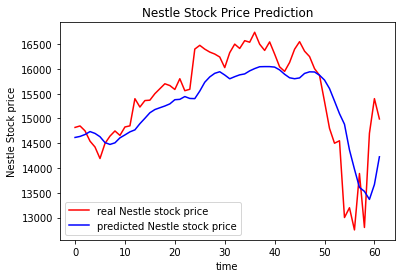

In [ ]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(real_stock_values,color = 'red', label = 'real Nestle stock price')
plt.plot(predicted_stock_price,color = 'blue', label = 'predicted Nestle stock price')
plt.title("Nestle Stock Price Prediction")
plt.xlabel("time")
plt.ylabel('Nestle Stock price')
plt.legend()
plt.show()

In [ ]:
# RMSE EVALUATION For RNN MODEL
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_values, predicted_stock_price))
print("Total model error is", rmse)

Total model error is 613.9935343749743


### Prediction of stocks on Testdata 2

In [ ]:
real_stock_values2.shape

(58, 1)

In [ ]:
#get the predicted for the etst data that is 2017 jan
dataset_total = pd.concat((data_train['Open'],dataset_test1['Open'],dataset_test2['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test1)-len(dataset_test2)-rolling_window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test2 = []
upper_limit = rolling_window + real_stock_values2.shape[0]
for i in range(rolling_window,upper_limit):
  X_test2.append(inputs[i-rolling_window:i,0])

X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2,(X_test2.shape[0], X_test2.shape[1],1))
predicted_stock_price2 = RNNmodel.predict(X_test2)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

In [ ]:
predicted_stock_price2.shape

(58, 1)

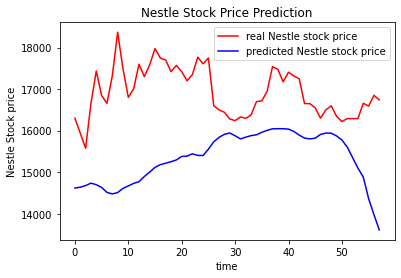

In [ ]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(real_stock_values2,color = 'red', label = 'real Nestle stock price')
plt.plot(predicted_stock_price2,color = 'blue', label = 'predicted Nestle stock price')
plt.title("Nestle Stock Price Prediction")
plt.xlabel("time")
plt.ylabel('Nestle Stock price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse2 = math.sqrt(mean_squared_error(real_stock_values2, predicted_stock_price2))
print("Total model error is - ", rmse2)

Total model error is -  1822.3332839070945


epochs -100 
rmse 
test 1 -- 763
test 2 -- 2111

epochs 75
rmse
test 1 -- 604
test 2 -- 1573

epochs 60 
rmse
test1 -- 593
test2 -- 1568

epochs 55
rmse
test1 -- 668
test2 --1780

# Building an LSTM

In [ ]:
#initialise RNN
regressor = Sequential()

In [ ]:
#add dense when you add output layer
#add first lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.25))

In [ ]:
#adding second LSTM layer
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.25))

In [ ]:
#adding the third layer
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.5))

In [ ]:
#adding the 4th layer
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.5))

In [ ]:
#adding 5th LSTM layer
#last layer would not have return sequence of errors
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

In [ ]:
#output dense layer
regressor.add(Dense(units = 1))

In [ ]:
#compiling rnn
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train,Y_train, epochs = 60 , batch_size = 32)

Epoch 1/60
15/15 [==============================] - 10s 72ms/step - loss: 0.0736
Epoch 2/60
15/15 [==============================] - 1s 74ms/step - loss: 0.0254
Epoch 3/60
15/15 [==============================] - 1s 75ms/step - loss: 0.0152
Epoch 4/60
15/15 [==============================] - 1s 74ms/step - loss: 0.0142
Epoch 5/60
15/15 [==============================] - 1s 74ms/step - loss: 0.0168
Epoch 6/60
15/15 [==============================] - 1s 75ms/step - loss: 0.0171
Epoch 7/60
15/15 [==============================] - 1s 75ms/step - loss: 0.0117
Epoch 8/60
15/15 [==============================] - 1s 75ms/step - loss: 0.0144
Epoch 9/60
15/15 [==============================] - 1s 76ms/step - loss: 0.0137
Epoch 10/60
15/15 [==============================] - 1s 75ms/step - loss: 0.0134
Epoch 11/60
15/15 [==============================] - 1s 74ms/step - loss: 0.0143
Epoch 12/60
15/15 [==============================] - 1s 74ms/step - loss: 0.0140
Epoch 13/60
15/15 [=================

## Part 3 - Predicting the stock prices on the test data via LSTM Model

### Test data 1

In [ ]:
real_stock_values.shape

(62, 1)

In [ ]:
#get the predicted for the etst data that is 2017 jan
dataset_total = pd.concat((data_train['Open'],dataset_test1['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test1)-rolling_window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(rolling_window,(rolling_window+real_stock_values.shape[0])):
  X_test.append(inputs[i-rolling_window:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(62, 1)

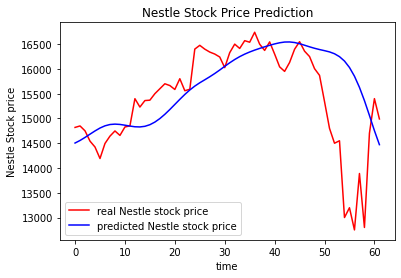

In [ ]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(real_stock_values,color = 'red', label = 'real Nestle stock price')
plt.plot(predicted_stock_price,color = 'blue', label = 'predicted Nestle stock price')
plt.title("Nestle Stock Price Prediction")
plt.xlabel("time")
plt.ylabel('Nestle Stock price')
plt.legend()
plt.show()

In [ ]:
# RMSE EVALUATION For LSTM MODEL
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_values, predicted_stock_price))
print("Total model error is", rmse)

Total model error is 940.4638018337104


###Test data 2

In [ ]:
real_stock_values2.shape

(58, 1)

In [ ]:
#get the predicted for the etst data that is 2017 jan
dataset_total = pd.concat((data_train['Open'],dataset_test1['Open'],dataset_test2['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test1)-len(dataset_test2)-rolling_window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test2 = []
upper_limit = rolling_window + real_stock_values2.shape[0]
for i in range(rolling_window,upper_limit):
  X_test2.append(inputs[i-rolling_window:i,0])

X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2,(X_test2.shape[0], X_test2.shape[1],1))
predicted_stock_price2 = regressor.predict(X_test2)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

In [ ]:
predicted_stock_price2.shape

(58, 1)

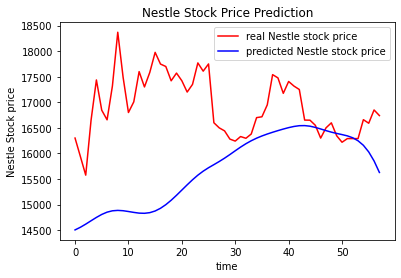

In [ ]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(real_stock_values2,color = 'red', label = 'real Nestle stock price')
plt.plot(predicted_stock_price2,color = 'blue', label = 'predicted Nestle stock price')
plt.title("Nestle Stock Price Prediction")
plt.xlabel("time")
plt.ylabel('Nestle Stock price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse2 = math.sqrt(mean_squared_error(real_stock_values2, predicted_stock_price2))
print("Total model error is - ", rmse2)

Total model error is -  1604.2846030159874


lstm
epochs 100
test1 -- 915
test2 --2031

epochs 75
rmse
test1 --902
test2 -- 1901

epochs 60
rmse
test1 -- 1018
test2 -- 1467

rolling window
30- 789
25- 873
10-993
40- 848
50-830
60 - 851.7
30 -- epochs 100-- 5layers added ---- 760
35 -- epochs 100-- 5layers added ---- 845.76
window now keeping fixed
changing network hyperparameters
units 40 dropout(0.25)*2 and dropout(0.5)*4 rest same